In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import standard_normal, uniform
from typing import Any

This is how we can sample a function with some standard gaussian random noise added:

In [2]:
def sample_funcion(f: Any, low: float, high: float, count: int) -> tuple[np.ndarray, np.ndarray]:
    x_samples = uniform(low, high, count)
    return (x_samples, f(x_samples) + standard_normal(count))

Test how this function works:

In [3]:
def f(x: np.ndarray) -> np.ndarray:
    return 10 * np.sin(x)

samples_x, samples_y = sample_funcion(f, 0.0, 6.0, 7)
true_x = np.linspace(0.0, 6.0, 250)
true_y = f(true_x)

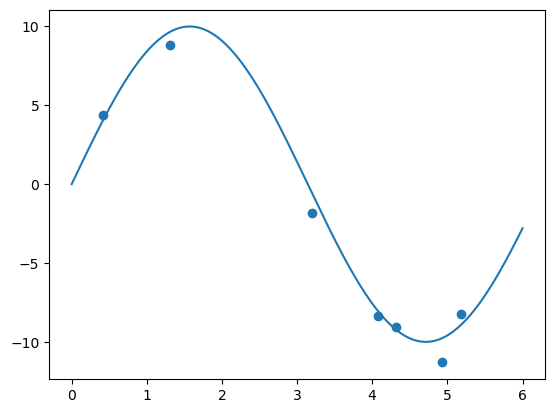

In [4]:
plt.plot(true_x, true_y)
plt.scatter(samples_x, samples_y)
plt.show()

Superb. Now, the approximation. Both linear and cubic functions belong to a broader class of polynomials, so we can save some lines of code and write a single function to build 'em all approximations:

Builds a $k$-order polynomial approximation of a dataset of $n$ points $\left(x_i, y_i \right)$.

$x = \left[ x_i \right]_{i = \overline{1,n}},\ y = \left[ x_i \right]_{i = \overline{1,n}}$.

$X = \left[ {x_i}^j \right]_{i = \overline{1,n}}^{j = \overline{0,k}}$  is a matrix $n \times k$,

$w = \left[ w_j \right]_{j = \overline{0, k}}$ is a vector of coefficients,

The equation this function solves is ${X_i}^jw^j = y_i$ in terms of least squares.

In [9]:
def polynomial_approximation(x: np.ndarray, y: np.ndarray, order: int):
    X = np.hstack([(np.power(x, k))[:, None] for k in range(order + 1)])
    w = np.linalg.pinv(X) @ y
    return lambda z: w @ np.array([np.power(z, k) for k in range(order + 1)])

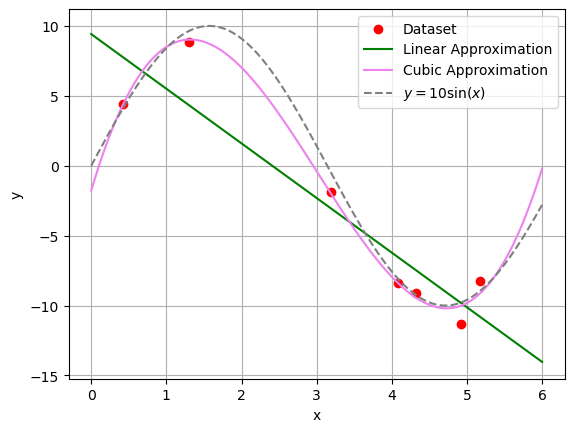

In [18]:
linear_y = polynomial_approximation(samples_x, samples_y, 1)(true_x)
cubic_y = polynomial_approximation(samples_x, samples_y, 3)(true_x)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(samples_x, samples_y, color='red', label='Dataset')
plt.plot(true_x, linear_y, color='green', label='Linear Approximation')
plt.plot(true_x, cubic_y, color='violet', label='Cubic Approximation')
plt.plot(true_x, true_y, color='gray', linestyle='dashed', label=r'$y = 10\sin(x)$')
plt.legend()
plt.show()